## Extra credit

Importing the modules that we need:

In [9]:
import numpy as np
import timeit
import math
import itertools
import matplotlib.pyplot as plt

## Extra credit problems

Consider the following array of a million uniform random floats:

In [41]:
np.random.seed(42)
ra = np.random.random(1000000)
print(ra)

[0.37454012 0.95071431 0.73199394 ... 0.41807198 0.42867126 0.92944855]


Use this array and numpy operations to approximate $\pi$. Use numpy operations (e.g., no explicit `for` loops allowed).

You get the extra credit if you get the first three digits right, i.e.,`3.14`.

If you figured $\pi$ out, you can try the harder problem of estimating Euler's constant $e$ (without the use of the exponential function) for additional extra credit.


0.18340450985343382 0.9830375301917122


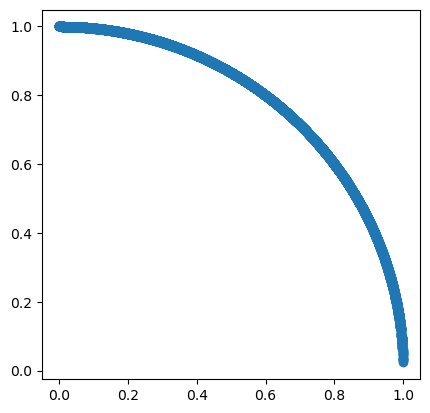

In [49]:
#Pi: First try

# x= between 0 and 1 (could be negative, but we're just drawing a quarter of the circle)
# y= sqrt(1-x^2) or - sqrt(1-x^2):  We just choose positive y, and then work on the perimeter
#Plot x,y
#calculate perimeter: Shou
x_pi = ra
y_pi = np.sqrt(1-x_pi*x_pi)
plt.plot(x_pi[0:10000],y_pi[0:10000],'o')
plt.gca().set_aspect(1)
print(x_pi[15],y_pi[15])

In [57]:
#Wacky function, should do it different but it's fine for this fast work 
def pi_approximation(x_array, y_array):
    x_array_sorted = np.sort(x_array)
    y_array_sorted = np.sort(-y_array) #descending order
    x_arr1 = x_array_sorted[1:]; x_arr2 = x_array_sorted[:-1]
    y_arr1 = y_array_sorted[1:]; y_arr2 = y_array_sorted[:-1]
    x_diffs = x_arr1-x_arr2; y_diffs = y_arr2-y_arr1
    differences = np.sqrt(x_diffs*x_diffs+y_diffs*y_diffs)
    #print(differences)
    return np.sum(differences)*2
    

In [64]:
estimate = pi_approximation(x_pi,y_pi)
estimate

3.137919951643796

This is not 3.14 just yet, I assume due to two things: 1) square root inaccuracies (probably less important) and 2) the arc between two neighboring points is longer than the section between them. We can just try working with squares instead, maybe that leads to a good enough solution. 
#### Side note: I actually tried a semicircle first, but the ordering for the y values was a little more complicated than just .sort(-y) because it should increase till its x pair is negative, then decrease. Seemed too complicated for me, so I just switched to estimating on a quarter circle

In [67]:
#Second try: Adjust to arcs

#There is a difference between the arc and the section between two neighboring points. If we "average", the typical arclength between two
#points is pi/2/999999 (999999 arcs, overall pi/2 is the perimeter), and the "typical" coordinate difference between two points is (1/999999,-1/999999), leading to typical section length = sqrt(2)/999999.
#This would suggest multiplying by pi/(2*sqrt2), however, that is a massive overshoot (the ratio between arc and section is just less in any case when the x coordinate diff and y coord diff is inequal)
#   plus we'd use pi to get pi.
#So my idea is: The arclength equals Phi, the angle in radians. So I just take the neighbouring x values (y is not needed), take their arccos values, and the difference equals the angle, thus the arclength.
x_sort = np.sort(ra)
angles = np.arccos(x_sort)
print(angles)
#At this point I just realized that, well, this works, but it's pointless... We're adding differences between neighbours, the sum will be arccos(min)-arccos(max), which is roughly pi/2-0 soo...
#I might aswell just do this:
print("Estimate:",2*angles[0])
#But this seems unfair, I didn't even use the "randomness" of the numbers. I might aswell just write arccos(ra[1]-ra[1]) and we're done. Soo...


[1.57079581 1.57079549 1.5707941  ... 0.00328352 0.00318439 0.00183583]
Estimate: 3.1415916159006603


In [76]:
#Third try: Area (why not)
def pi_approximation_area(x_array, y_array):
    x_array_sorted = np.sort(x_array)
    y_array_sorted = -np.sort(-y_array) #descending order
    x_arr1 = x_array_sorted[1:]; x_arr2 = x_array_sorted[:-1]
    y_arr1 = y_array_sorted[1:]; y_arr2 = y_array_sorted[:-1]
    x_diffs = x_arr1-x_arr2; y_inbetween = (y_arr2+y_arr1)/2
    area = np.sum(x_diffs*y_inbetween)
    return np.sum(area)*4
    
our_pi = pi_approximation_area(x_pi,y_pi)
our_pi

#For some reason, this is much closer than the perimeter one, and good enough.
#I guess afterall, it makes sense. The section-arc fraction can be as high as pi/(2*sqrt2)=1.11... for ANY neighboring points.
#    But here, I did not check the difference between areas, however, the smaller the x value (the higher y is), the bigger the areas are overall,
#    and the difference/all_area is very small, clearly limited by some small number (that I did not compute, but exist for each height).

3.141590568728185

And we're done! I had another idea: turning the numbers into integers (unfair) and then $\sum_{n=1}^{\infty} \frac{1}{n^2} = \pi^2/6$.

Let's attempt the other exercise too: "estimating Euler's constant $e$ (without the use of the exponential function)"

To be honest, I did not really find any solution that makes very much use of random numbers and uses them to DIRECTLY approximate *e*, except maybe solution #5. I did do one (solution #2) but it is a little artificial, and other solutions just don't really rely on random numbers that much, or they just rely on one element of many. Those I would call A-level good solutions (I have none). I have some B-level (reasonable, but bit weird/unfair) solutions, and some sketchy (C-level) ones.

In [92]:
#1st (rated B): e^(pi*i) = -1  numpy deals with complex numbers. (-1)^(1/(pi*i)) = e, can use 1/i =-i

#We use the random numbers to get pi, and then we can easily compute e from pi aswell.
complex_exponent = complex(0,-1/our_pi)
e_est = np.power(-1,complex_exponent,dtype=complex)
print(e_est)
    #Turn it into a real number:
print("Estimate method e_pi_i gives:", np.real(e_est))
    #This is fine, but I dunno, is a bit sketchy. Complex exponents I believe make use of e^(ix)=cosx+isinx so I'm not sure this somehow under the hood assumes e=2.71..


(2.718283632399814+0j)
Estimate method e_pi_i gives: 2.718283632399814


In [95]:
#2nd (rated B+): t^x and differential approximation (TAKES LONG TIME!!!)
    #This idea is that e^x 's derivative is itself, whereas for t^x the derivative is ln(t)*t^x. We can compute the ratio between the two and the closer we get to 1, the closer we are toe
t = np.linspace(2.0,5.0,3501) #Assuming e is between 2 and 5, but we could do any region (well, 0 and 1 does not work but you get it). Just less time this way
arguments = np.sort(ra)
args1 = arguments[1:]; args2 = arguments[:-1]; argdiffs = args1-args2
    #Sorry for using for, but np.power just does elementwise power [t_values] [exponents]
for tval in t:
    tval_pows = np.power(tval, arguments)
    tval_pows_big = tval_pows[1:]; tval_pows_small = tval_pows[:-1]
    t_derivatives = (tval_pows_big-tval_pows_small)/argdiffs
    ratio_lower = np.mean(t_derivatives/tval_pows[1:]) #Just to balance between overshoot and undershoot
    ratio_higher = np.mean(t_derivatives/tval_pows[0:-1])
    if (ratio_higher+ratio_lower)>2: #avg bigger than 1
        print("Estimate method t^x: ", tval)
        #print(tval_pows); print(t_derivatives); print(ratio_lower, ratio_higher)
        break
    #To be fair it works, and uses the random numbers. But is quite ineffective/illogical. Could just look at f(x)=t^x -> f'(0), this equals ln(t) so we aim for value 1 again, much less computation, and that'd again just use the smallest value
    

Estimate method t^x:  2.718285714285714


In [93]:
#3rd (rated C/C+): e^x is close to 1+x for small x, in fact, the difference by Taylor's series is x^2/2! + x^3/3! + ... If we pick x = 0.1, then the error is certainly less than 0.01
    #e is roughly (1+x)^(1/x)
x = np.min(ra)
print("Estimate method e^x=1+x gives: ", np.power(1+x,1/x))
    #Sketchy, I'm just using the smallest number which is very likely very small
    #Similar type of solution: resize to [0,100], floor the maximal value, use it as N in (1+1/N)^N

Estimate method e^x=1+x gives:  2.718281122694845


In [108]:
#4th (rated B+): 1/x integration from 1 to e equals 1
    #Idea: rescale ra to (1,t) and integrate the function 1/x (using this) from 1 to t, iterate t
    
    #To make the algorithm fast (not use for loop), I'll just modify the randoms interval to [1,3] and hopefully that gives a good enough estimate
arguments = np.sort(ra)*2+1
args1 = arguments[1:]; args2 = arguments[:-1]; argdiffs = args1-args2
reciprocals = 1/arguments
areas = (reciprocals[1:]+reciprocals[:-1])/2*argdiffs
i = (np.cumsum(areas)<=1).argmin() #I saw this trick on Stack Overflow: cumulative sum gives back an array element [i] equals sum_0^i-1 areas[j], and argmin gives back the last index for which the sum is at most 1
print("Estimate method 1/x integration gives: ", 1/reciprocals[i])
    #Works, makes more sense than 2), again I assumed that e is less than 5 (you can do a while loop till we get what we want, but I didn't bother)

Estimate method 1/x integration gives:  2.718278340756778


2.770612995683429
2.7840452544142718
2.840681148669009
2.912283999948182


[2.896732936933044,
 3.275834099783395,
 2.5614176067460237,
 3.0000011554188384,
 2.712442957881427,
 2.905946674227584,
 2.490632901637566,
 2.8839630165893437,
 2.795527193767485,
 2.553102864516132,
 2.9623064431210198,
 2.7031368844561556,
 2.6011392656535133,
 2.9616350488697862,
 2.6731822049891676,
 2.5114878731260406,
 4.514246800381447,
 1.3464109341218204,
 0.010665515057406573,
 2.8178024734676896e-05,
 12.124553049957912,
 5.3370278570815355,
 2.8467791363274704,
 2.4314221625995747,
 2.4632125549593664,
 2.5009304252708584,
 2.7777592065095527,
 2.57326398878194,
 2.7441075015338403,
 2.87678131203754,
 3.0077217712745528,
 2.8167802077353685,
 2.6537083001485873,
 2.4888247906211394,
 3.138670255676977,
 2.6599831259902107,
 2.60606832611964,
 3.09700494840366,
 2.483021997302681,
 2.503898524292944]

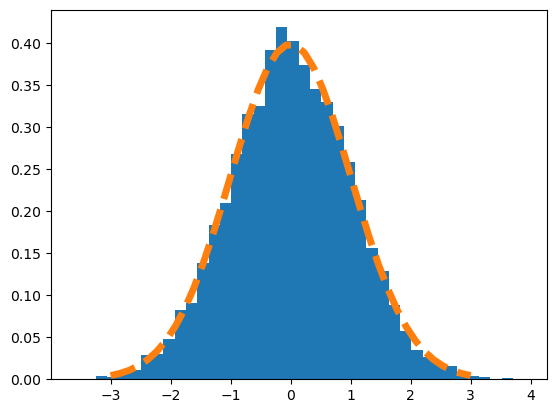

In [178]:
#5th (?): Turn the numbers into a standard normal distribution like in the homework, then we know f(x) = 1/sqrt(2*pi) * e^(0.5x^2), and we can just iterate through x to estimate e
def e_estimate_with_normal_dist(size=1000000,bincount = 30):
    np.random.seed(20001104) #my birthday
    #We can use rand1000 = np.random.random((1000,10000)) and then turn it into normal distribution, but for accuracy reasons, I just assume we already have std. normal dist. values
    rand_normal = np.random.normal(0,1, size)
    plt.clf()
    plt.hist(rand_normal, bincount, density=True)
    theoretical_pdf = 1./(2.*np.pi)**.5*np.exp(-((np.linspace(-3,3,bincount))**2.)/2) #Just for looks, I dont need the exponential function. Standard normal dist
    plt.plot(np.linspace(-3,3,bincount), theoretical_pdf,'--',linewidth=5) 

    hist_data,bin_edges = np.histogram(rand_normal,bins=bincount,density=True)

    e_estimates = []
    #Use for loop (its just 50 bins)
    for i in range(bincount):
        x_i = (bin_edges[i]+bin_edges[i+1])/2
        f_x_i = hist_data[i]
        if f_x_i == 0.0:
            continue
        e_estimates.append(np.power((f_x_i*np.sqrt(2*np.pi)),-2/x_i/x_i))
    print(np.mean(e_estimates))
    return e_estimates
    
e_estimate_with_normal_dist(1000000, 30)
e_estimate_with_normal_dist(1000000, 50)
e_estimate_with_normal_dist(10000, 20)
e_estimate_with_normal_dist(10000, 40)

This works, but is fairly inaccurate.. There is some overshoot everytime, which tends to be less and less as we use less bins, but it's inaccurate for too small values. I tried with just 10000 numbers, the best is 2.84 there.

But to be fair, many values in the bins (50 bin case) equal to 2.73... Maybe taking the mean is not the best idea. Let's try this:

2.7840452544142718
New estimate with mode:  2.71


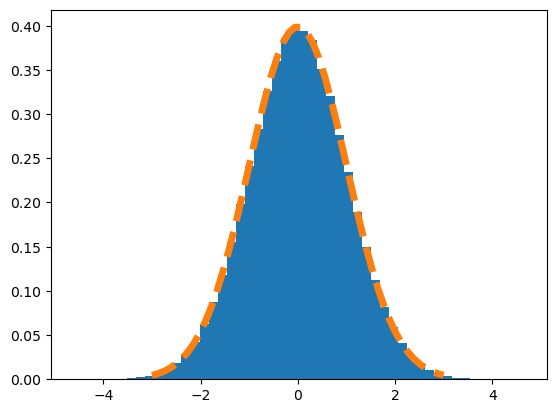

In [188]:
estimatelist=e_estimate_with_normal_dist(1000000, 50)
two_digit_cutoff = [math.floor(100*x) for x in estimatelist]
est_most_common=max(set(two_digit_cutoff), key = two_digit_cutoff.count)/100
print("New estimate with mode: ",est_most_common)

I guess that works, although it's not too reliable. 

Below I collected some other ideas:

6-7th-etc.: Weird approximations with """random""" numbers (could just be any set of numbers don't need them to be random)

6th example: recreating 1+1/2+1/3!+... we could just multply each random value by 10 then take the floor function, take out 0 values and occuring values, you (99%+) get a set of [1..9] and just make this calculation
    #Too unfair, zero real use of the random numbers

7th: Creating new values from the random numbers that just lead to e:
    # For example: the function x^(1/x) is maximal at e. We take the random numbers, rescale them to lets say 1 to 10 (this assumes we know 1<e<10) and check for the highest values, then use e.g Newton method to find the maximum (can just look for the root of the derivative aswell). I also don't find this fair, because you could do this from just any 2 numbers and will lead to a solution, if e is in the bound of them. + also assumes we know some bounds that include e

More ideas:

-Using ln(1+x) formula 

-Somehow create a Poisson, or exponential distribution of numbers from the uniform distribution, then somehow get e from it

-somehow from 1/(1-x) formula, just a thought

-somehow from cos(x) or sin(x) exponential formulas e.g. (e^ix + e^-ix)/2